## Load necessary Libraries

In [1]:
#Import Libraries
from bs4 import BeautifulSoup
import re
import pandas as pd
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast


import numpy as np
# Install new libraries
#%pip install pyspellchecker
#%pip install TextBlob

import warnings
warnings.filterwarnings('ignore')

## Load processed and original data sets


In [2]:
# Load processed dataset
preprocessed_vodafone_reviews = pd.read_csv('pre_processed_vodafone_data.csv')  

# Load raw original data for comparison
vodafone_reviews = pd.read_csv('vodafone_reviews.csv')  
vodafone_reviews['review'] = vodafone_reviews['review'].str.lower()
vodafone_reviews['title'] = vodafone_reviews['title'].str.lower()

In [3]:
# Fix representation of lists in the imported csv :(

# Abstract syntax tree is used to recreate the lists of tuples stored in the pre-processed data
for i in range(len(preprocessed_vodafone_reviews)):
    preprocessed_vodafone_reviews.sentences.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.sentences.iloc[i]))
    preprocessed_vodafone_reviews.noun_phrases.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.noun_phrases.iloc[i]))
    preprocessed_vodafone_reviews.lemmatised_sentences.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.lemmatised_sentences.iloc[i]))
    preprocessed_vodafone_reviews.bi_grams.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.bi_grams.iloc[i]))
    preprocessed_vodafone_reviews.tri_grams.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.tri_grams.iloc[i]))
    preprocessed_vodafone_reviews.words.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.words.iloc[i]))
    preprocessed_vodafone_reviews.nouns.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.nouns.iloc[i]))
    
#preprocessed_vodafone_reviews.head(5)

## Perform EDA Against Processed Dataset

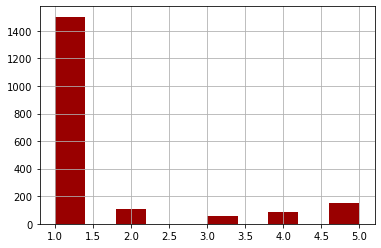

In [4]:
##########################################
##  Check Promoter Score Distribution

preprocessed_vodafone_reviews['score'] = pd.to_numeric(preprocessed_vodafone_reviews['score'])

preprocessed_vodafone_reviews['score'].hist(color='#990000');


### Check for recognised and unrecognised words before and after the normalisation process

In [5]:
#################################################
##  Create accessor functions to obtain a list of review words

# remove extra punctuation from the data
def strip_punct(word):
    word =  re.sub("[,\.;:\(\)\{\}\[\]!?\"\s\n\$%_\/]", " ", word)
    word =  re.sub("\s+", " ", word)
    return word

# Return a list of words in proessed data
def list_of_words(df, column):
    word_frame = pd.DataFrame(columns = ["words"])
    for i in range(len(df)):
        for sentence in df[column].iloc[i]:
            words = sentence[0].split(" ")
            word_frame = word_frame.append(pd.DataFrame(words,columns = ["words"]))
        
    return word_frame

# return a list of words in the raw data
def list_of_raw_words(df, column):
    word_frame = pd.DataFrame(columns = ["words"])
    for i in range(len(df)):
        words = strip_punct(df[column].iloc[i])
        words = words.split(" ")
        word_frame = word_frame.append(pd.DataFrame(words,columns = ["words"]))
        
    return word_frame

8929 Unique terms were found in the data
1972 Unknown terms found



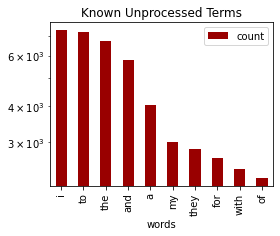

In [6]:
####################################
## Determine recognised and unrecognised words in the un-normalised data


# Create dataframe containing list of words from reviews and titles
word_frame = pd.DataFrame(columns = ["words"])
#print(len(word_frame))
word_frame = word_frame.append(list_of_raw_words(vodafone_reviews, "review"))
word_frame = word_frame.append(list_of_raw_words(vodafone_reviews, "title"))

# remove empty strings from list
word_frame = word_frame[word_frame['words']!=""]

# Initialise spellchecker
spell = SpellChecker()

unknown_words = spell.unknown(word_frame["words"].to_list())

unknown_word_counts = word_frame[word_frame['words'].isin(unknown_words)].value_counts().rename_axis('words').reset_index(name='count')


known_word_counts = word_frame[~word_frame['words'].isin(unknown_words)].value_counts().rename_axis('words').reset_index(name='count')



print(str(word_frame.words.nunique()) + " " + "Unique terms were found in the data")
print(str(len(unknown_words)) + " " + "Unknown terms found")
print("")

# Most common Known Words
known_word_counts.head(10).plot(kind='bar',x='words', y='count', figsize=(4,3), logy=True, color='#990000', title="Known Unprocessed Terms" );
#print(unknown_words)

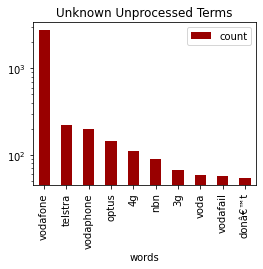

In [7]:
# Most Common Unknown Words
unknown_word_counts.head(10).plot(kind='bar',x='words', y='count', figsize=(4,3), logy=True, color='#990000', title="Unknown Unprocessed Terms" );


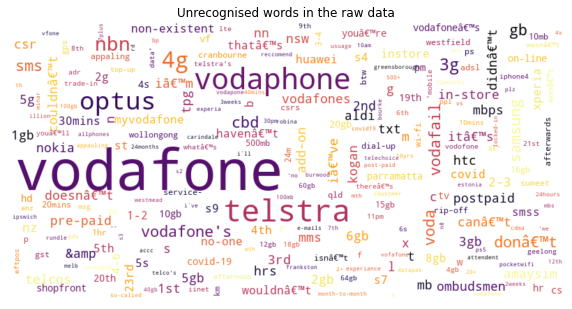

In [8]:
# Produce a wordcloud of unknown terms in the Raw Data

all_unknown_words = word_frame[word_frame['words'].isin(unknown_words)]['words'].value_counts()

#print(all_unknown_words)

wordcloud_unknown = WordCloud(max_font_size=40, max_words=100000, random_state=2021, scale=2,
                             background_color='white', contour_width=3, 
                             collocations=False, colormap='inferno').generate_from_frequencies(all_unknown_words);

plt.figure(figsize=(10, 7));
plt.imshow(wordcloud_unknown, interpolation='bilinear')
plt.title("Unrecognised words in the raw data")
plt.axis("off");

6488 Unique terms were found in the data
1345 Unknown terms found


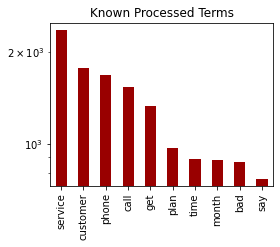

In [9]:
#################################################
##  Determine recognised and unrecognised words in the normalised data

word_frame = pd.DataFrame(columns = ["words"])
word_frame = word_frame.append(list_of_words(preprocessed_vodafone_reviews, "lemmatised_sentences"))

word_frame = word_frame[word_frame['words']!=""]

print(str(word_frame.words.nunique()) + " " + "Unique terms were found in the data")

spell = SpellChecker()

unknown_words = spell.unknown(word_frame["words"].to_list())

unknown_word_counts = word_frame[word_frame['words'].isin(unknown_words)].value_counts().rename_axis('words').reset_index(name='count')

print(str(len(unknown_words)) + " " + "Unknown terms found")

word_frame[~word_frame['words'].isin(unknown_words)]["words"].value_counts().head(10).plot(kind='bar',figsize=(4,3), logy=True, color='#990000', title="Known Processed Terms");

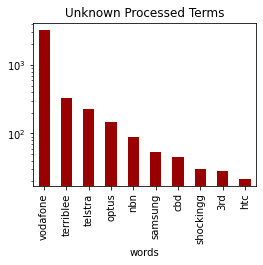

In [10]:
unknown_word_counts.head(10).plot(kind='bar',x='words', y='count',legend="",  figsize=(4,3), logy=True, color='#990000', title="Unknown Processed Terms" );

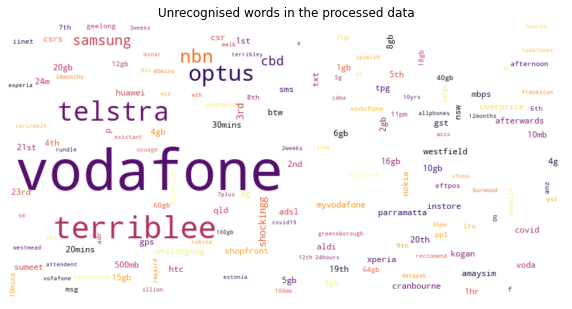

In [11]:

all_unknown_words = word_frame[word_frame['words'].isin(unknown_words)]['words'].value_counts()

#print(all_unknown_words)

wordcloud_unknown = WordCloud(max_font_size=40, max_words=100000, random_state=2021, scale=2,
                             background_color='white', contour_width=3, 
                             collocations=False, colormap='inferno').generate_from_frequencies(all_unknown_words);

plt.figure(figsize=(10, 7));
plt.imshow(wordcloud_unknown, interpolation='bilinear')
plt.title("Unrecognised words in the processed data")
plt.axis("off");

## Look at the relationship between review sentiment as calculated using the Vader lexicon and the review score

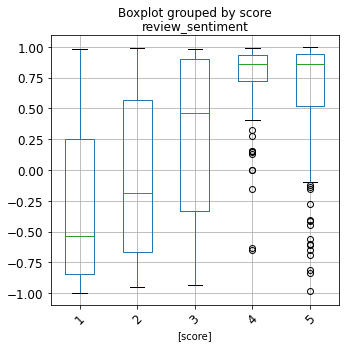

In [20]:
# Display a boxplot of sentiment scores for each promoter score

bplot = preprocessed_vodafone_reviews[['score', 'review_sentiment']].boxplot( by="score", rot=45, fontsize=12, figsize=(5,5));



## Determine the Pearson Correlation between the sentiment of a sentence in which a term is used and the review rating 

In [21]:
# Returns a dataframe containing a list of terms, the sentiment of the
# sentence in which they were found, and the associated review score

def term_df_with_scores(df, column):
    term_frame = pd.DataFrame(columns = ["term","sentiment","promoter_score"])

    for i in range(len(df)):
        row = df[column].iloc[i]
        row_frame = pd.DataFrame.from_records(row, columns=['term','sentiment','promoter_score'])
        term_frame = term_frame.append(row_frame)
            
    return term_frame

In [22]:
## Create a function to return the correlation between score and sentiment for 
# two terms, ngrams, noun phrases etc

def get_corr(df, column):
    term_frame = term_df_with_scores(df, column)
    term_frame[["sentiment", "promoter_score"]] = term_frame[["sentiment", "promoter_score"]].apply(pd.to_numeric)
    result_frame = pd.DataFrame(columns = ["term","sentiment_correlation","count"])
    unique_terms = term_frame.term.unique()
    
    for term in unique_terms:
        temp_frame = term_frame[term_frame.term==term]
        correlation = temp_frame["sentiment"].corr(temp_frame["promoter_score"])
        count = len(temp_frame)
        if not np.isnan(correlation):
            result_frame = result_frame.append(pd.DataFrame([[term, correlation, count]], columns = ["term","sentiment_correlation","count"]))
    return result_frame
    

In [23]:
# Get the pearson correlation between sentence sentiment and review score for 
# Key extracted features

nounphrases_correlations = get_corr(preprocessed_vodafone_reviews, "noun_phrases")
bi_gram_correlations = get_corr(preprocessed_vodafone_reviews, "bi_grams")
tri_gram_correlations = get_corr(preprocessed_vodafone_reviews, "tri_grams")
word_correlations = get_corr(preprocessed_vodafone_reviews, "words")
noun_correlations = get_corr(preprocessed_vodafone_reviews, "nouns")

In [24]:
# Save corelations to avoid re-processing where necessary

nounphrases_correlations.to_csv ('nounphrases_correlations.csv', index = None, header=True)
bi_gram_correlations.to_csv ('bi_gram_correlations.csv', index = None, header=True)
tri_gram_correlations.to_csv ('tri_gram_correlations.csv', index = None, header=True)
word_correlations.to_csv ('word_correlations.csv', index = None, header=True)
noun_correlations.to_csv ('nouns_correlations.csv', index = None, header=True)

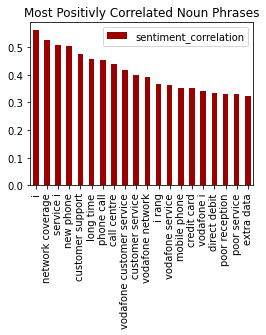

In [36]:
nounphrases_correlations[nounphrases_correlations['count']>20].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar',figsize=(4,3), x='term', xlabel="", y='sentiment_correlation', color='#990000', title='Most Positivly Correlated Noun Phrases');


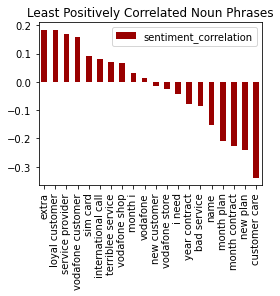

In [37]:
nounphrases_correlations[nounphrases_correlations['count']>20].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(4,3), x='term', xlabel="", y='sentiment_correlation', color='#990000', title='Least Positively Correlated Noun Phrases');


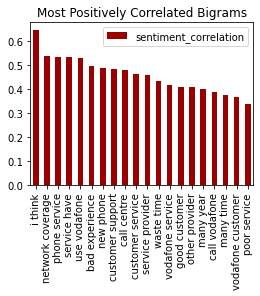

In [38]:
bi_gram_correlations[bi_gram_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar',figsize=(4,3), x='term', xlabel="", y='sentiment_correlation', color='#990000', title='Most Positively Correlated Bigrams');


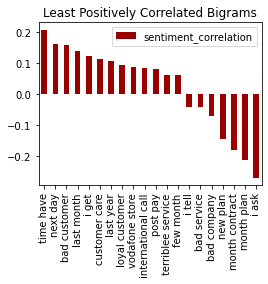

In [39]:
bi_gram_correlations[bi_gram_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(4,3), x='term', xlabel="", y='sentiment_correlation', color='#990000', title='Least Positively Correlated Bigrams');


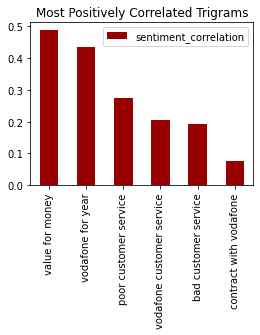

In [40]:
tri_gram_correlations[tri_gram_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar',figsize=(4,3), x='term', xlabel="", y='sentiment_correlation', color='#990000', title='Most Positively Correlated Trigrams');


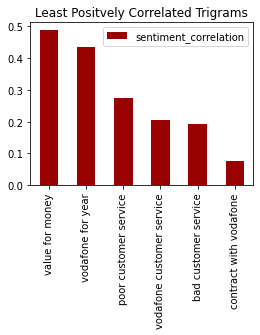

In [41]:
tri_gram_correlations[tri_gram_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(4,3), x='term', xlabel="", y='sentiment_correlation', color='#990000', title='Least Positvely Correlated Trigrams');


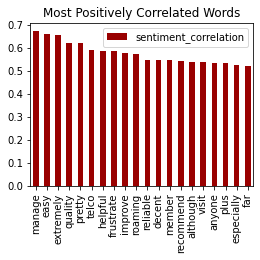

In [42]:
word_correlations[word_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar', xlabel="",figsize=(4,3), x='term', y='sentiment_correlation', color='#990000', title='Most Positively Correlated Words');


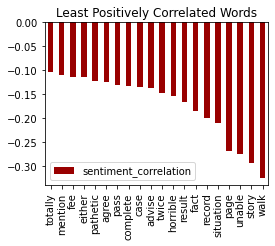

In [43]:
word_correlations[word_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(4,3), x='term', xlabel="", y='sentiment_correlation', color='#990000', title='Least Positively Correlated Words');


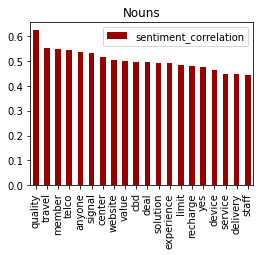

In [33]:
noun_correlations[noun_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar',figsize=(4,3), x='term', xlabel="", y='sentiment_correlation', color='#990000', title='Nouns');


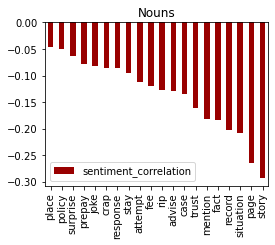

In [34]:
noun_correlations[noun_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(4,3), x='term', xlabel="", y='sentiment_correlation', color='#990000', title='Nouns');


## Determine which words and phrases change frequency the most between detractors and promotors

####  For this analysis we're looking at whether a term apperas in the text at least once, and aren't interested in how many times it may be repeated in a specific review

In [46]:
# Get number of documents each word or phrase appears in

def doc_count(df, column):
    
    # Produce a 2 column df with the document ID and the column to be measured
    temp_df = pd.DataFrame(columns=['review_id', 'term'])
    num_reviews = df.review_id.nunique()
    for i in range(len(df)):
        review_id = df['review_id'].iloc[i]
        for item in df[column].iloc[i]:
            term = item[0]
            temp_df = temp_df.append(pd.DataFrame([[review_id, term]], columns = ["review_id", "term"]))
            
    results = temp_df.groupby(by='term', as_index=False).agg({'review_id': pd.Series.nunique})
    results['percentage'] = results['review_id']/num_reviews * 100
    results = results.sort_values(by='percentage',ascending=False)
    # add a column for rank
    results['rank'] = 0
    r = 1
    for i in range(len(results)):
        results['rank'].iloc[i] = r
        r += 1
    
    results = results.rename(columns={"review_id": "reviews_containing_term"})
    return results
    
    
#doc_count(preprocessed_vodafone_reviews, 'noun_phrases').head()

In [47]:

# return a dataframe containing all uniqueue terms for
# a feature
def get_unique_terms(df, column):
    
    temp_df = pd.DataFrame(columns=['term'])
    for i in range(len(df)):
        for item in df[column].iloc[i]:
            term = item[0]
            temp_df = temp_df.append(pd.DataFrame([[term]], columns = ["term"]))
            
    return pd.DataFrame(temp_df.term.unique(), columns=['term'])

# Determin the percentage of reviews a term appears in for
# dteractors, passive customer and promoters
# as well as the change in percentage between detractors
# and promotors
def track_rank_changes(df, column):
    #results = pd.DataFrame(columns=['term', 'perc_detractor', 'perc_passive', 'perc_promoter', 'total_change'])
    all_unique_terms = get_unique_terms(df, column)
    #print(all_unique_terms)
    all_unique_terms['perc_detractor'] = 0
    all_unique_terms['perc_passive'] = 0
    all_unique_terms['perc_promoter'] = 0
    all_unique_terms['total_change'] = 0    
    
    
    detractors = doc_count(df[df['score'] <=3], column)
    passive = doc_count(df[df['score'] ==4], column)
    promotors = doc_count(df[df['score'] ==5], column)
    
    for i in range(len(all_unique_terms)):
        if all_unique_terms['term'].iloc[i] in detractors['term'].tolist():
            perc_detractor = detractors[detractors['term'] == all_unique_terms['term'].iloc[i]].percentage.iloc[0]
        else:
            perc_detractor = 0
            
        if all_unique_terms['term'].iloc[i] in passive['term'].tolist():
            perc_passive = passive[passive['term'] == all_unique_terms['term'].iloc[i]].percentage.iloc[0]
        else:
            perc_passive = 0
        
        if all_unique_terms['term'].iloc[i] in promotors['term'].tolist():
            perc_promoter = promotors[promotors['term'] == all_unique_terms['term'].iloc[i]].percentage.iloc[0]
        else:
            perc_promoter = 0
            
        total_change = perc_promoter - perc_detractor
        
        all_unique_terms['perc_detractor'].iloc[i] = perc_detractor
        all_unique_terms['perc_passive'].iloc[i] = perc_passive
        all_unique_terms['perc_promoter'].iloc[i] = perc_promoter
        all_unique_terms['total_change'].iloc[i] = total_change        

    return all_unique_terms.sort_values(by='total_change',ascending=False)
    

In [49]:
# Determine change in term appearance for each extracted feature

track_noun_phrases = track_rank_changes(preprocessed_vodafone_reviews, 'noun_phrases') 
print("Noun Phrases Done")
track_nouns =  track_rank_changes(preprocessed_vodafone_reviews, 'nouns')
print("Nouns Done")
track_words = track_rank_changes(preprocessed_vodafone_reviews, 'words') 
print("Words Done")
track_bigrams = track_rank_changes(preprocessed_vodafone_reviews, 'bi_grams') 
print("Bigrams done")
track_trigrams = track_rank_changes(preprocessed_vodafone_reviews, 'tri_grams') 
print("Trigrams done")

Noun Phrases Done
Nouns Done
Words Done
Bigrams done
Trigrams done


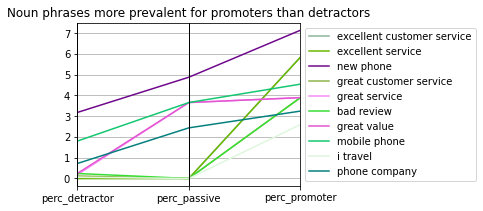

In [73]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3));


parallel_coordinates(track_noun_phrases[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Noun phrases more prevalent for promoters than detractors");

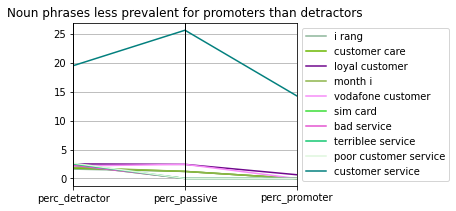

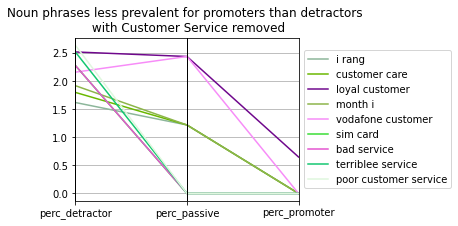

In [75]:
plt.figure(figsize=(4,3));
parallel_coordinates(track_noun_phrases[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Noun phrases less prevalent for promoters than detractors");

plt.figure(figsize=(4,3));
parallel_coordinates(track_noun_phrases[['term','perc_detractor','perc_passive','perc_promoter']].tail(10).head(9), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Noun phrases less prevalent for promoters than detractors \n with Customer Service removed");

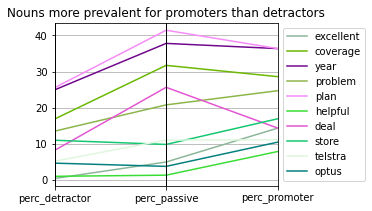

In [78]:
plt.figure(figsize=(4,3));
parallel_coordinates(track_nouns[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Nouns more prevalent for promoters than detractors");

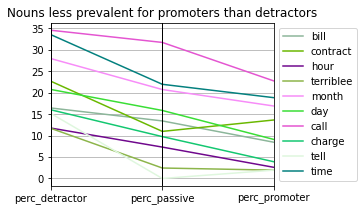

In [77]:
plt.figure(figsize=(4,3));
parallel_coordinates(track_nouns[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Nouns less prevalent for promoters than detractors");

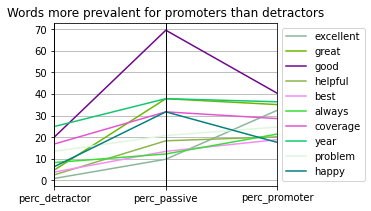

In [81]:
plt.figure(figsize=(4,3));
parallel_coordinates(track_words[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Words more prevalent for promoters than detractors");

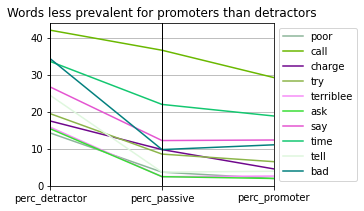

In [82]:
plt.figure(figsize=(4,3));
parallel_coordinates(track_words[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Words less prevalent for promoters than detractors");

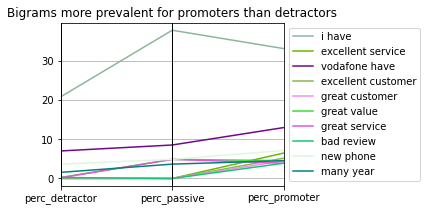

In [85]:
plt.figure(figsize=(4,3));
parallel_coordinates(track_bigrams[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Bigrams more prevalent for promoters than detractors");

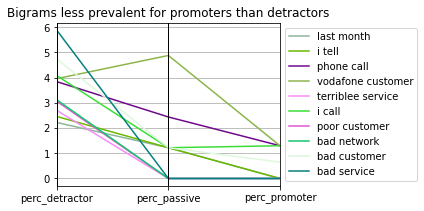

In [86]:
plt.figure(figsize=(4,3));
parallel_coordinates(track_bigrams[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Bigrams less prevalent for promoters than detractors");

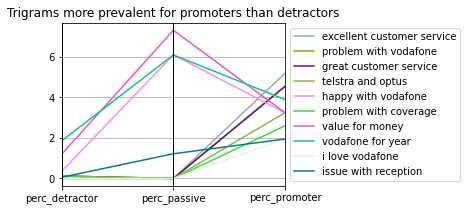

In [87]:
plt.figure(figsize=(4,3));
parallel_coordinates(track_trigrams[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Trigrams more prevalent for promoters than detractors");

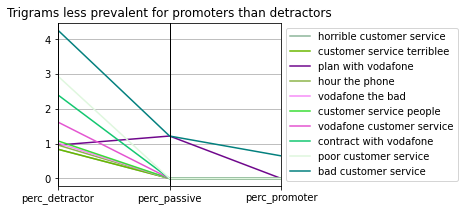

In [88]:
plt.figure(figsize=(4,3));
parallel_coordinates(track_trigrams[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.title("Trigrams less prevalent for promoters than detractors");